[0.  1.5 3.  4.5 6.  7.5]
[0.  1.5 3.  4.5 6.  7.5]
(0, 4)


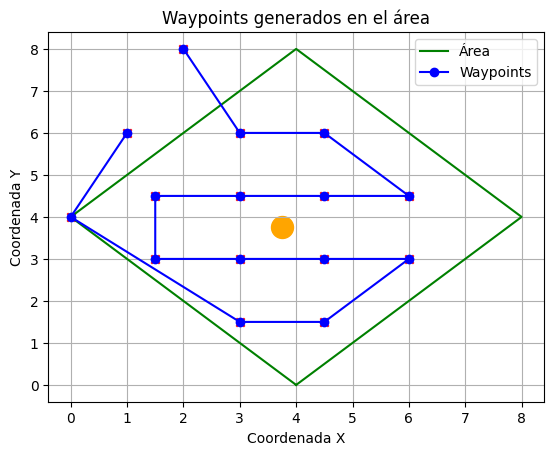

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Definir el área (puede ser un polígono)
#area = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
#area = Polygon([(0, 0), (4, 0), (4, 4), (0, 4)]) 
area = Polygon([(4, 0), (0, 4), (4, 8), (8, 4)])  # Ejemplo de un cuadrado

# Crear una cuadrícula dentro del área
def generar_waypoints_area(polygon, paso, x_inicio, y_inicio, x_fin, y_fin):
    centroide_x = 0
    centroide_y = 0
    n_puntos = 0
    min_x, min_y, max_x, max_y = polygon.bounds
    waypoints = []
    y_vals = np.arange(min_y, max_y, paso)
    x_vals = np.arange(min_x, max_x, paso)
    waypoints.append((x_inicio, y_inicio))
    print(y_vals)
    print(x_vals)

    #Vamos a ver por que punto empezamos dependiendo de cual sea el más cercano. Primero calculamos la distancia a todos los puntos
    dist_1 = np.linalg.norm(np.array((4,0)) - np.array((x_inicio, y_inicio)))
    dist_2 = np.linalg.norm(np.array((0,4)) - np.array((x_inicio, y_inicio)))
    dist_3 = np.linalg.norm(np.array((4,8)) - np.array((x_inicio, y_inicio)))
    dist_4 = np.linalg.norm(np.array((8,4)) - np.array((x_inicio, y_inicio)))

    dists=[dist_1, dist_2, dist_3, dist_4]
    puntos = [(4, 0), (0, 4), (4, 8), (8, 4)]  # Ejemplo de un cuadrado
    
    # Obtener el punto más cercano
    min_index = np.argmin(dists)
    closest_point = puntos[min_index]
    waypoints.append(closest_point)  # Agregar el punto más cercano
    print(closest_point)

    punto_final=(x_fin, y_fin)
    
    if punto_final [1] < max_y/2:
       y_vals = np.flip(y_vals)
    if punto_final [0] < max_x/2:
        x_vals = np.flip(x_vals)
    
    for y in y_vals:
        for x in x_vals:
            point = Point(x, y)
            if polygon.contains(point):  # Verificar si el punto está dentro del polígono
                waypoints.append((x, y))
                centroide_x+=x
                centroide_y+=y
                n_puntos+=1
        x_vals=np.flip(x_vals)
        
    #Ahora añadimos un punto final
    
    waypoints.append(punto_final)

    
    
    
    return waypoints, n_puntos, centroide_x, centroide_y

# Generar los waypoints
waypoints, n_puntos, centroide_x, centroide_y = generar_waypoints_area(area, 1.5, 1, 6, 2, 8)

centroide_x=centroide_x/n_puntos
centroide_y=centroide_y/n_puntos

# Dibujar el área y los waypoints
x_coords, y_coords = zip(*waypoints)

# Dibujar el área (polígono)
x_poly, y_poly = area.exterior.xy
plt.plot(x_poly, y_poly, color='green', label='Área')



# Dibujar el recorrido (waypoints)
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Waypoints')
plt.scatter(x_coords, y_coords, marker='x', color='red')  # Marcar los puntos
plt.scatter(centroide_x, centroide_y, s=250, marker='o', color='orange')
plt.title('Waypoints generados en el área')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.show()


In [90]:
len(waypoints)

0

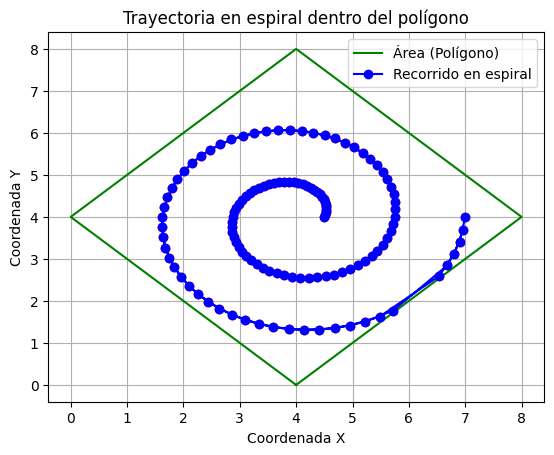

In [39]:
# Definir el polígono (un área en la que el dron debe volar)
area = Polygon([(4, 0), (0, 4), (4, 8), (8, 4)])  # Ejemplo de un cuadrado

# Función para generar una trayectoria en espiral dentro del polígono
def generar_waypoints_espiral_en_poligono(centro, radio_inicial, pasos, incremento_radio, polygon):
    waypoints = []
    theta = np.linspace(0, 4 * np.pi, pasos)  # Genera el ángulo para la espiral
    radio = np.linspace(radio_inicial, radio_inicial + incremento_radio * pasos, pasos)
    
    for r, t in zip(radio, theta):
        x = centro[0] + r * np.cos(t)
        y = centro[1] + r * np.sin(t)
        punto = Point(x, y)
        if polygon.contains(punto):  # Verificar si el punto está dentro del polígono
            waypoints.append((x, y))
            waypoints.reverse()
    return waypoints

# Parámetros de la espiral
centro = (4, 4)  # Debe estar dentro del polígono
radio_inicial = 0.5
pasos = 125
incremento_radio = 0.02

# Generar waypoints en espiral dentro del polígono
waypoints_espiral = generar_waypoints_espiral_en_poligono(centro, radio_inicial, pasos, incremento_radio, area)

# Dibujar el polígono y los waypoints
x_coords, y_coords = zip(*waypoints_espiral)
x_poly, y_poly = area.exterior.xy

plt.plot(x_poly, y_poly, color='green', label='Área (Polígono)')
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Recorrido en espiral')
plt.scatter(x_coords, y_coords, color='red')  # Marcar los puntos
plt.title('Trayectoria en espiral dentro del polígono')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.show()


(3, 3)


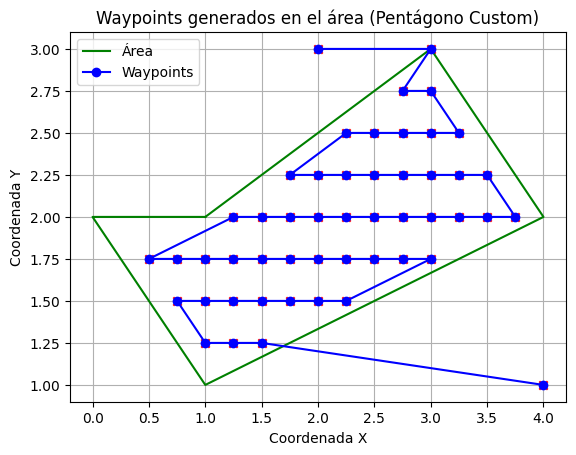

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Definir los vértices del pentágono
def crear_poligono(puntos):
    vertices = []
    for i in range(len(puntos)):
        vertices.append(puntos[i])
    return Polygon(vertices)

# Crear un pentágono con los vértices definidos
puntos=[(1,2), (0,2), (1,1), (4,2), (3,3)]
area = crear_poligono(puntos)

# Crear una cuadrícula dentro del área
def generar_waypoints_area(polygon, paso, x_inicio, y_inicio, x_fin, y_fin):
    centroide_x = 0
    centroide_y = 0
    n_puntos = 0
    min_x, min_y, max_x, max_y = polygon.bounds
    waypoints = []
    y_vals = np.arange(min_y, max_y, paso)
    x_vals = np.arange(min_x, max_x, paso)
    
    waypoints.append((x_inicio, y_inicio))

    dists=np.zeros((len(puntos)))
    
    for i in range(len(puntos)):
        dists[i] = np.linalg.norm(puntos[i] - np.array((x_inicio, y_inicio)))

    # Obtener el punto más cercano
    min_index = np.argmin(dists)
    closest_point = puntos[min_index]
    waypoints.append(closest_point)  # Agregar el punto más cercano
    print(closest_point)

    punto_final=(x_fin, y_fin)

    if punto_final [1] < max_y/2:
       y_vals = np.flip(y_vals)
    if punto_final [0] < max_x/2:
        x_vals = np.flip(x_vals)
    
    for y in y_vals:
        for x in x_vals:
            point = Point(x, y)
            if polygon.contains(point):  # Verificar si el punto está dentro del polígono
                waypoints.append((x, y))
                centroide_x+=x
                centroide_y+=y
                n_puntos+=1
        x_vals=np.flip(x_vals)
        
    #Ahora añadimos un punto final
    
    waypoints.append(punto_final)

    return waypoints, n_puntos, centroide_x, centroide_y

# Generar los waypoints
waypoints, n_puntos, centroide_x, centroide_y = generar_waypoints_area(area, 0.25, 2, 3, 4, 1)

centroide_x=centroide_x/n_puntos
centroide_y=centroide_y/n_puntos

# Dibujar el área y los waypoints
x_coords, y_coords = zip(*waypoints)

# Dibujar el pentágono
x_poly, y_poly = area.exterior.xy
plt.plot(x_poly, y_poly, color='green', label='Área')

# Dibujar el recorrido (waypoints)
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Waypoints')
plt.scatter(x_coords, y_coords, marker='x', color='red')  # Marcar los puntos
plt.title('Waypoints generados en el área (Pentágono Custom)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.show()


(4, 0)


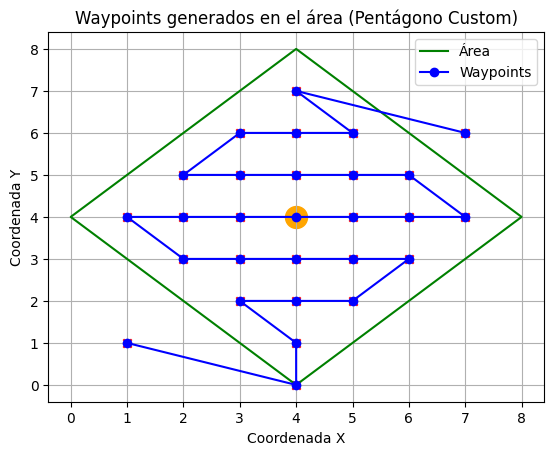

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Definir los vértices del pentágono
def crear_poligono(puntos):
    vertices = []
    for i in range(len(puntos)):
        vertices.append(puntos[i])
    return Polygon(vertices)

# Crear un pentágono con los vértices definidos
#puntos=[(1,2), (0,2), (1,1), (4,2), (3,3)] #FORMA IRREGULAR
puntos = [(4, 0), (0, 4), (4, 8), (8, 4)] #CUADRADO
area = crear_poligono(puntos)

# Crear una cuadrícula dentro del área
def generar_waypoints_area(polygon, paso, x_inicio, y_inicio, x_fin, y_fin, estrategia):
    
    centroide_x = 0
    centroide_y = 0
    n_puntos = 0

    min_x, min_y, max_x, max_y = polygon.bounds
    waypoints = []
    
    y_vals = np.arange(min_y, max_y, paso)
    x_vals = np.arange(min_x, max_x, paso)
    
    punto_final=(x_fin, y_fin)
    waypoints.append((x_inicio, y_inicio))

    if estrategia == 1:
        dists=np.zeros((len(puntos)))
        
        for i in range(len(puntos)):
            dists[i] = np.linalg.norm(puntos[i] - np.array((x_inicio, y_inicio)))
    
        # Obtener el punto más cercano
        min_index = np.argmin(dists)
        closest_point = puntos[min_index]
        waypoints.append(closest_point)  # Agregar el punto más cercano
        print(closest_point)
    
        punto_final=(x_fin, y_fin)
    
        if punto_final [1] < max_y/2:
           y_vals = np.flip(y_vals)
        if punto_final [0] < max_x/2:
            x_vals = np.flip(x_vals)
        
        for y in y_vals:
            for x in x_vals:
                point = Point(x, y)
                if polygon.contains(point):  # Verificar si el punto está dentro del polígono
                    waypoints.append((x, y))
                    centroide_x+=x
                    centroide_y+=y
                    n_puntos+=1
            x_vals=np.flip(x_vals)
                
    if estrategia == 2:
        print("Estrategia 2")
        centro = (4, 4)  # Debe estar dentro del polígono
        radio_inicial = 0.5
        pasos = 125
        incremento_radio = 0.02

        theta = np.linspace(0, 4 * np.pi, pasos)  # Genera el ángulo para la espiral
        radio = np.linspace(radio_inicial, radio_inicial + incremento_radio * pasos, pasos)
        
        for r, t in zip(radio, theta):
            x = centro[0] + r * np.cos(t)
            y = centro[1] + r * np.sin(t)
            punto = Point(x, y)
            n_puntos+=1
            centroide_x+=x
            centroide_y+=y
            if polygon.contains(punto):  # Verificar si el punto está dentro del polígono
                waypoints.append((x, y))
                waypoints.reverse()
    
            
    #Ahora añadimos un punto final
        
    waypoints.append(punto_final)
    
    return waypoints, n_puntos, centroide_x, centroide_y

# Generar los waypoints
waypoints, n_puntos, centroide_x, centroide_y = generar_waypoints_area(area, paso=1, x_inicio=1, y_inicio=1, x_fin=7, y_fin=6, estrategia=1)

centroide_x=centroide_x/n_puntos
centroide_y=centroide_y/n_puntos


# Dibujar el área y los waypoints
x_coords, y_coords = zip(*waypoints)

# Dibujar el pentágono
x_poly, y_poly = area.exterior.xy
plt.plot(x_poly, y_poly, color='green', label='Área')

# Dibujar el recorrido (waypoints)
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Waypoints')
plt.scatter(x_coords, y_coords, marker='x', color='red')  # Marcar los puntos
plt.scatter(centroide_x, centroide_y, s=250, marker='o', color='orange') #Marcar el centroide
plt.title('Waypoints generados en el área (Pentágono Custom)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.show()


Estrategia 2


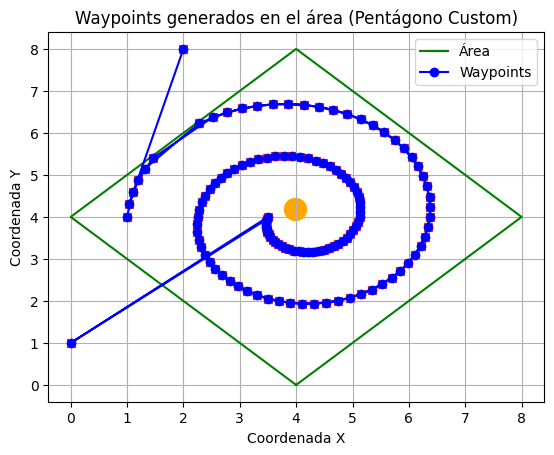

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Definir los vértices del pentágono
def crear_poligono(puntos):
    vertices = []
    for i in range(len(puntos)):
        vertices.append(puntos[i])
    return Polygon(vertices)

# Crear un pentágono con los vértices definidos
#puntos=[(1,2), (0,2), (1,1), (4,2), (3,3)] #FORMA IRREGULAR
puntos = [(4, 0), (0, 4), (4, 8), (8, 4)] #CUADRADO
area = crear_poligono(puntos)

# Crear una cuadrícula dentro del área
def generar_waypoints_area(polygon, paso, x_inicio, y_inicio, x_fin, y_fin, estrategia):
    
    centroide_x = 0
    centroide_y = 0
    n_puntos = 0

    min_x, min_y, max_x, max_y = polygon.bounds
    waypoints = []
    
    y_vals = np.arange(min_y, max_y, paso)
    x_vals = np.arange(min_x, max_x, paso)
    
    punto_final=(x_fin, y_fin)
    waypoints.append((x_inicio, y_inicio))

    if estrategia == 1:
        dists=np.zeros((len(puntos)))
    
        punto_final=(x_fin, y_fin)
    
        if y_inicio > max_y/2:
            print("flip")
            y_vals = np.flip(y_vals)
        if x_inicio > max_x/2:
            print("flip")
            x_vals = np.flip(x_vals)
        
        for y in y_vals:
            for x in x_vals:
                point = Point(x, y)
                if polygon.contains(point):  # Verificar si el punto está dentro del polígono
                    waypoints.append((x, y))
                    centroide_x+=x
                    centroide_y+=y
                    n_puntos+=1
            x_vals=np.flip(x_vals)
                
    if estrategia == 2:
        print("Estrategia 2")
        centro = (4, 4)  # Debe estar dentro del polígono
        radio_inicial = 0.5
        pasos = 125
        incremento_radio = 0.02

        theta = np.linspace(0, 4 * np.pi, pasos)  # Genera el ángulo para la espiral
        radio = np.linspace(radio_inicial, radio_inicial + incremento_radio * pasos, pasos)
        signo = 1
        
        if x_fin < max_x/2:
            signo = -1
            
        for r, t in zip(radio, theta):
            x = centro[0] + signo*r * np.cos(t)
            y = centro[1] + signo*r * np.sin(t)
            punto = Point(x, y)
            n_puntos+=1
            centroide_x+=x
            centroide_y+=y
            if polygon.contains(punto):  # Verificar si el punto está dentro del polígono
                waypoints.append((x, y))
                waypoints.reverse()
    
            
    #Ahora añadimos un punto final
        
    waypoints.append(punto_final)
    
    return waypoints, n_puntos, centroide_x, centroide_y

# Generar los waypoints
waypoints, n_puntos, centroide_x, centroide_y = generar_waypoints_area(area, paso=0.5, x_inicio=0, y_inicio=1, x_fin=2, y_fin=8, estrategia=2)

centroide_x=centroide_x/n_puntos
centroide_y=centroide_y/n_puntos


# Dibujar el área y los waypoints
x_coords, y_coords = zip(*waypoints)

# Dibujar el pentágono
x_poly, y_poly = area.exterior.xy
plt.plot(x_poly, y_poly, color='green', label='Área')

# Dibujar el recorrido (waypoints)
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Waypoints')
plt.scatter(x_coords, y_coords, marker='x', color='red')  # Marcar los puntos
plt.scatter(centroide_x, centroide_y, s=250, marker='o', color='orange') #Marcar el centroide
plt.title('Waypoints generados en el área (Pentágono Custom)')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.legend()
plt.show()


In [40]:
waypoints

[(7.0, 3.9999999999999987),
 (6.899092648706979, 3.4042213155440426),
 (6.682763933923576, 2.8487353262014397),
 (5.725250329842002, 1.771160322098987),
 (5.223514396867781, 1.5056962590151564),
 (4.686262376627707, 1.3494985334268037),
 (4.136630217552816, 1.3058816802522806),
 (3.5976173170342105, 1.3733845736603811),
 (3.09112456009561, 1.545963170308649),
 (2.6370645056494806, 1.8133722558905405),
 (2.2525798705701328, 2.161715067874532),
 (1.9514009269866777, 2.574132963130336),
 (1.7433656964648363, 3.031601952564473),
 (1.6341192144748216, 3.513799138979409),
 (1.625, 4.000000000000001),
 (1.7131135645758295, 4.469967109400544),
 (1.8915846983390683, 4.904792264352736),
 (2.1499727272787617, 5.287656984830602),
 (2.4748272638203552, 5.604480807212851),
 (2.8503564452974506, 5.844432478990609),
 (3.2591754888914926, 6.000285798007281),
 (3.683100739819053, 6.068609114218911),
 (4.1039533344310675, 6.049785089314781),
 (4.504337151601216, 5.947864848041274),
 (4.868357823030981, 5

In [1]:
def calcular_centroide(vertices):
    """
    Calcula el centroide de un polígono.
    
    Args:
        vertices (list of tuples): Lista de puntos (x, y) que definen el polígono.
        
    Returns:
        (float, float): Coordenadas (x, y) del centroide.
    """
    if len(vertices) < 3:
        raise ValueError("Un polígono debe tener al menos 3 puntos.")
    
    # Inicializar las sumas
    suma_x = 0
    suma_y = 0
    area = 0

    # Calcular el área y las coordenadas del centroide
    for i in range(len(vertices)):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % len(vertices)]  # siguiente punto, con wrap-around
        factor = x1 * y2 - x2 * y1
        area += factor
        suma_x += (x1 + x2) * factor
        suma_y += (y1 + y2) * factor

    area /= 2
    if area == 0:
        raise ValueError("El área del polígono es cero; asegúrate de que el polígono es válido.")

    # Calcular las coordenadas del centroide
    centroide_x = suma_x / (6 * area)
    centroide_y = suma_y / (6 * area)

    return (centroide_x, centroide_y)

# Ejemplo de uso
vertices = [(0, 0), (4, 0), (4, 3), (0, 3)]
centroide = calcular_centroide(vertices)
print(f"El centroide del polígono es: {centroide}")


El centroide del polígono es: (2.0, 1.5)
